In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
%matplotlib inline
import matplotlib.pyplot as plt

import spacy
import preprocess_kgptalkie as ps  # import the cleaning package
import re  # regex
from sklearn import set_config
set_config(display="diagram")

import nltk
import nltk.corpus
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('Solarize_Light2')
import squarify


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("../web_scrap_database/peterobi_data.csv",usecols=[0,1,2,4,5])
df.shape

(10001, 5)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,User,user_location,Date Created,Source of Tweet,Tweet
0,Wynwonder,Lagos Nigeria,2022-08-15 23:47:14+00:00,Twitter for iPhone,@mancityis @akeemaths @inecnigeria @opebanwo @...
1,RealRiversp,"Lagos, Nigeria",2022-08-15 23:24:31+00:00,Twitter for Android,you can not kip lying n blaspheming against pe...
2,RecAngelo2,NaN,2022-08-15 23:08:09+00:00,Twitter for Android,Your Man of the Year 2022\nNigerians have spok...
3,yinkakenny1,NaN,2022-08-15 23:02:54+00:00,Twitter for Android,SERAP calling for the neck of INEC. \n\nGiven ...
4,williwite,"Lagos, Nigeria",2022-08-15 23:01:09+00:00,Twitter for Android,@ose_anenih @emmaikumeh @OfficialPDPNig @inecn...


In [4]:
df.dtypes

User               object
user_location      object
Date Created       object
Source of Tweet    object
Tweet              object
dtype: object

In [5]:
df['Date Created'] = pd.to_datetime(df['Date Created'])
df

,User,user_location,Date Created,Source of Tweet,Tweet
0,Wynwonder,Lagos Nigeria,2022-08-15 23:47:14+00:00,Twitter for iPhone,@mancityis @akeemaths @inecnigeria @opebanwo @...
1,RealRiversp,"Lagos, Nigeria",2022-08-15 23:24:31+00:00,Twitter for Android,you can not kip lying n blaspheming against pe...
2,RecAngelo2,NaN,2022-08-15 23:08:09+00:00,Twitter for Android,Your Man of the Year 2022\nNigerians have spok...
3,yinkakenny1,NaN,2022-08-15 23:02:54+00:00,Twitter for Android,SERAP calling for the neck of INEC. \n\nGiven ...
4,williwite,"Lagos, Nigeria",2022-08-15 23:01:09+00:00,Twitter for Android,@ose_anenih @emmaikumeh @OfficialPDPNig @inecn...
...,...,...,...,...,...
9996,kachithe1st,planet earth,2022-08-06 22:25:47+00:00,Twitter for Android,@DavidHundeyin @NewKings12 @inecnigeria @inecn...
9997,nftartandluv,The metaverse,2022-08-06 22:23:34+00:00,Twitter for iPhone,@mc_9tro @DavidHundeyin @inecnigeria 😂😂😂 Ode. ...
9998,marie_mimmie,Nigeria,2022-08-06 22:23:32+00:00,Twitter for iPhone,@fgx_jewelry @AhmedGashinge @NgLabour @FS_Yusu...
9999,MpaEjima,Vote Your Choice in 2023,2022-08-06 22:23:05+00:00,Twitter for Android,@inecnigeria


In [6]:
df.dropna(how ='any',inplace = True)
df

,User,user_location,Date Created,Source of Tweet,Tweet
0,Wynwonder,Lagos Nigeria,2022-08-15 23:47:14+00:00,Twitter for iPhone,@mancityis @akeemaths @inecnigeria @opebanwo @...
1,RealRiversp,"Lagos, Nigeria",2022-08-15 23:24:31+00:00,Twitter for Android,you can not kip lying n blaspheming against pe...
4,williwite,"Lagos, Nigeria",2022-08-15 23:01:09+00:00,Twitter for Android,@ose_anenih @emmaikumeh @OfficialPDPNig @inecn...
6,NzeOraezuna,"Lagos, Nigeria",2022-08-15 22:51:15+00:00,Twitter for Android,@JosephOnuorah Why can't people assess the vot...
9,leads_nigeria,"Kaduna, Nigeria",2022-08-15 22:49:21+00:00,Twitter for Android,"Youths, women and PWDs came out in their numbe..."
...,...,...,...,...,...
9995,kachithe1st,planet earth,2022-08-06 22:25:57+00:00,Twitter for Android,@DavidHundeyin @NewKings12 @inecnigeria @inecn...
9996,kachithe1st,planet earth,2022-08-06 22:25:47+00:00,Twitter for Android,@DavidHundeyin @NewKings12 @inecnigeria @inecn...
9997,nftartandluv,The metaverse,2022-08-06 22:23:34+00:00,Twitter for iPhone,@mc_9tro @DavidHundeyin @inecnigeria 😂😂😂 Ode. ...
9998,marie_mimmie,Nigeria,2022-08-06 22:23:32+00:00,Twitter for iPhone,@fgx_jewelry @AhmedGashinge @NgLabour @FS_Yusu...


In [7]:
# def get_clean(x):
#     x = str(x).lower().replace('\\', '').replace('_', ' ')
#     x = ps.cont_exp(x)
#     x = ps.remove_emails(x)
#     x = ps.remove_urls(x)
#     x = ps.remove_html_tags(x)
#     x = ps.remove_rt(x)
#     x = ps.remove_accented_chars(x)
#     x = ps.remove_special_chars(x)
#     x = re.sub("(.)\\1{2,}", "\\1", x)
#     return x

In [8]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [9]:
df['tweet'] = df.Tweet.apply(lambda x: clean_tweets(x))
df.tweet

0               How can you be this old and choose to ...
1       you can not kip lying n blaspheming against pe...
4                                   Opposition's handwork
6        Why can't people assess the voters register o...
9       Youths, women and PWDs came out in their numbe...
                              ...                        
9995                                         look at this
9996                                                     
9997       😂😂😂 Ode. One polling unit has like 500-1000...
9998             Why are you tagging INEC? E pain you ...
9999                                                     
Name: tweet, Length: 6629, dtype: object

In [10]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
df['Negetive'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
df['Neutral'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
df['compound'] = df['tweet'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [11]:
score = df.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [12]:
df['sentiment']= sentiment

In [13]:
df.head()

,User,user_location,Date Created,Source of Tweet,Tweet,tweet,Positive,Negetive,Neutral,compound,sentiment
0,Wynwonder,Lagos Nigeria,2022-08-15 23:47:14+00:00,Twitter for iPhone,@mancityis @akeemaths @inecnigeria @opebanwo @...,How can you be this old and choose to ...,0.000,0.829,0.171,-0.4753,negative
1,RealRiversp,"Lagos, Nigeria",2022-08-15 23:24:31+00:00,Twitter for Android,you can not kip lying n blaspheming against pe...,you can not kip lying n blaspheming against pe...,0.069,0.867,0.064,0.0454,neutral
4,williwite,"Lagos, Nigeria",2022-08-15 23:01:09+00:00,Twitter for Android,@ose_anenih @emmaikumeh @OfficialPDPNig @inecn...,Opposition's handwork,0.000,1.000,0.000,0.0000,neutral
6,NzeOraezuna,"Lagos, Nigeria",2022-08-15 22:51:15+00:00,Twitter for Android,@JosephOnuorah Why can't people assess the vot...,Why can't people assess the voters register o...,0.279,0.594,0.128,0.5106,positive
9,leads_nigeria,"Kaduna, Nigeria",2022-08-15 22:49:21+00:00,Twitter for Android,"Youths, women and PWDs came out in their numbe...","Youths, women and PWDs came out in their numbe...",0.161,0.839,0.000,0.6124,positive


In [14]:
df['sentiment'] = sentiment
df_cleaned = df.iloc[:,[1,2,3,5,10]]
df_cleaned

,user_location,Date Created,Source of Tweet,tweet,sentiment
0,Lagos Nigeria,2022-08-15 23:47:14+00:00,Twitter for iPhone,How can you be this old and choose to ...,negative
1,"Lagos, Nigeria",2022-08-15 23:24:31+00:00,Twitter for Android,you can not kip lying n blaspheming against pe...,neutral
4,"Lagos, Nigeria",2022-08-15 23:01:09+00:00,Twitter for Android,Opposition's handwork,neutral
6,"Lagos, Nigeria",2022-08-15 22:51:15+00:00,Twitter for Android,Why can't people assess the voters register o...,positive
9,"Kaduna, Nigeria",2022-08-15 22:49:21+00:00,Twitter for Android,"Youths, women and PWDs came out in their numbe...",positive
...,...,...,...,...,...
9995,planet earth,2022-08-06 22:25:57+00:00,Twitter for Android,look at this,neutral
9996,planet earth,2022-08-06 22:25:47+00:00,Twitter for Android,,neutral
9997,The metaverse,2022-08-06 22:23:34+00:00,Twitter for iPhone,😂😂😂 Ode. One polling unit has like 500-1000...,positive
9998,Nigeria,2022-08-06 22:23:32+00:00,Twitter for iPhone,Why are you tagging INEC? E pain you ...,negative


In [15]:
df_cleaned.sentiment.value_counts()

positive    2472
neutral     2191
negative    1966
Name: sentiment, dtype: int64

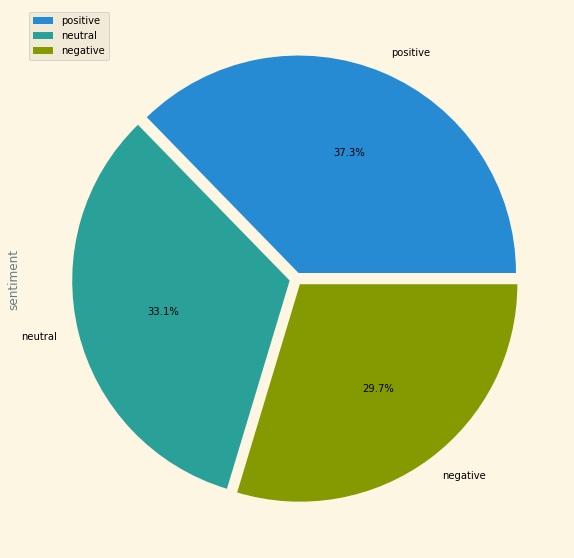

In [16]:
fig,ax = plt.subplots(figsize = (10,10))
df_cleaned.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03])
ax.legend()

In [17]:
df_cleaned['sentiment_encoded'] = df_cleaned.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

C:\Users\godwi\AppData\Local\Temp\ipykernel_16936\3273574070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment_encoded'] = df_cleaned.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)


In [18]:
df_cleaned

,user_location,Date Created,Source of Tweet,tweet,sentiment,sentiment_encoded
0,Lagos Nigeria,2022-08-15 23:47:14+00:00,Twitter for iPhone,How can you be this old and choose to ...,negative,-1
1,"Lagos, Nigeria",2022-08-15 23:24:31+00:00,Twitter for Android,you can not kip lying n blaspheming against pe...,neutral,0
4,"Lagos, Nigeria",2022-08-15 23:01:09+00:00,Twitter for Android,Opposition's handwork,neutral,0
6,"Lagos, Nigeria",2022-08-15 22:51:15+00:00,Twitter for Android,Why can't people assess the voters register o...,positive,1
9,"Kaduna, Nigeria",2022-08-15 22:49:21+00:00,Twitter for Android,"Youths, women and PWDs came out in their numbe...",positive,1
...,...,...,...,...,...,...
9995,planet earth,2022-08-06 22:25:57+00:00,Twitter for Android,look at this,neutral,0
9996,planet earth,2022-08-06 22:25:47+00:00,Twitter for Android,,neutral,0
9997,The metaverse,2022-08-06 22:23:34+00:00,Twitter for iPhone,😂😂😂 Ode. One polling unit has like 500-1000...,positive,1
9998,Nigeria,2022-08-06 22:23:32+00:00,Twitter for iPhone,Why are you tagging INEC? E pain you ...,negative,-1


In [19]:
mapping = pd.pivot_table(data =df_cleaned , index ='user_location' , columns = 'sentiment', values= 'sentiment_encoded',aggfunc='count')
mapping

sentiment,negative,neutral,positive
user_location,,,
,1.0,NaN,2.0
10 LNG RD.,NaN,1.0,NaN
Abu dhabi,1.0,NaN,NaN
Arsenal Fan to The WORLD🌍❤️,NaN,NaN,2.0
Canada,NaN,1.0,NaN
...,...,...,...
📍PORT-HARCOURT,NaN,1.0,1.0
📍𝐀𝐛𝐮𝐣𝐚 𝐍𝐢𝐠𝐞𝐫𝐢𝐚,NaN,NaN,3.0
🕊️at Peace,NaN,1.0,1.0


In [56]:
location_sentiment = df_cleaned
Top_location = location_sentiment.pivot_table(index ='user_location', columns ='sentiment',\
    values ='sentiment_encoded',aggfunc='count').sort_values('positive',ascending=False)[:20]
Top_location.reset_index()

sentiment,user_location,negative,neutral,positive
0,Nigeria,295.0,304.0,336.0
1,"Lagos, Nigeria",226.0,283.0,301.0
2,"Abuja, Nigeria",78.0,116.0,204.0
3,Lagos,52.0,39.0,53.0
4,Nigeria,9.0,11.0,36.0
5,"Federal Capital Territory, Nig",30.0,26.0,35.0
6,"Port Harcourt, Nigeria",24.0,27.0,33.0
7,Earth,15.0,23.0,26.0
8,Abuja,19.0,24.0,23.0
9,"Enugu, Nigeria",19.0,14.0,21.0


In [57]:
Top_location.reset_index().sum()

sentiment
user_location    NigeriaLagos, NigeriaAbuja, NigeriaLagosNigeri...
negative                                                     871.0
neutral                                                      954.0
positive                                                    1203.0
dtype: object